First, load the package and install the dependencies (may take a while if this is run for the first time, and the dependencies aren't on the machine.)

In [1]:
using Pkg
pkg"activate .; instantiate; precompile"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


And load the deps

In [2]:
using Plots, Parameters, BenchmarkTools, PerlaTonettiWaugh
gr(fmt = :png)

Plots.GRBackend()

## Stationary Solutions

First, define our common objects

In [3]:
params = parameters_simple()
settings = settings_simple()

(z_ex = [0.0, 0.00526316, 0.0105263, 0.0157895, 0.0210526, 0.0263158, 0.0315789, 0.0368421, 0.0421053, 0.0473684  …  3.10526, 3.31579, 3.52632, 3.73684, 3.94737, 4.15789, 4.36842, 4.57895, 4.78947, 5.0], T = 100.0, iterations = 1000, ts = 0.0:1.7543859649122806:100.0, stationary_x0 = PerlaTonettiWaugh.default_simple_stationary_x0, ode_solve_algorithm = Sundials.IDA{:Dense}(0, 0, 0, 0, 5, 7, 0.33, 3, 10, 0.0033, 5, 4, 10, 100, true, false))

These work for both the dynamic problem (where the functions ``r`` and ``\pi`` are evaluated at each time point),
and the static one (where we work with ``r(T)`` and ``\pi(T)``.)

First, let's inspect the stationary solution:

g = 0.020727753490265812


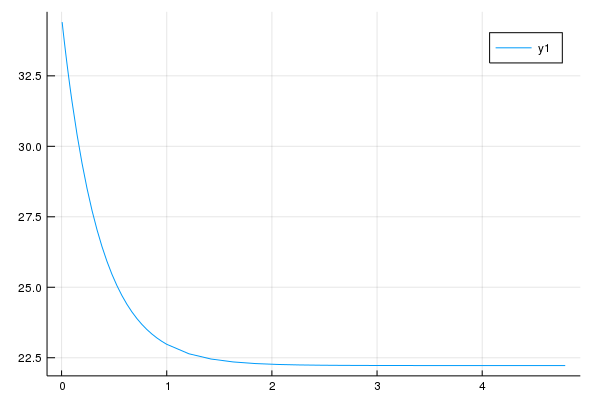

In [4]:
@unpack g, v = stationary_algebraic_simple(params, settings);
@show g; # algebraic growth rate
plot(settings.z_ex[2:end-1], v) # algebraic value function

The above is computed using an analytical expression from the paper (see equations 9, 10, and 11). We also have a numerical
method based on root-finding.

g = 0.02080684556397191


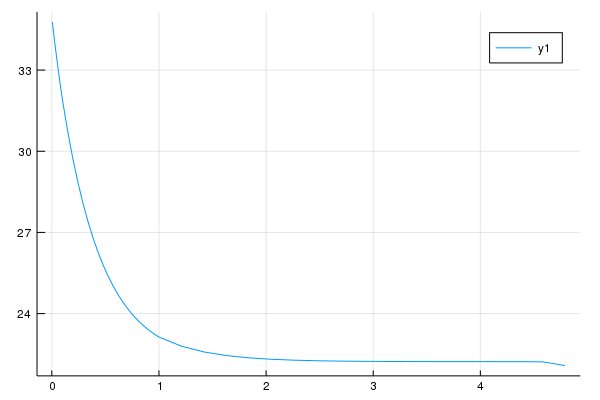

In [5]:
@unpack g, v = stationary_numerical_simple(params, settings);
@show g; # numerical growth rate
plot(settings.z_ex[2:end-1], v) # numerical value function

## Transition Dynamics

Let's add some movement to the parameters.

In [6]:
r = t -> (0.05 - 1e-02 * (1 - t / 100.0))

#3 (generic function with 1 method)

(As our default `T` is 100, and default `r` is a flat `t -> 0.05`, this doesn't change the stationary solution.)

To solve for the dynamics:

In [7]:
params = parameters_simple(r = r)

@unpack g_ts, v_ts, residuals = solve_simple_transition(params, settings)

(residuals = [4.12115e-13, -2.41585e-13, -1.98952e-13, 2.27374e-13, 7.10543e-14, -1.7053e-13, -1.42109e-14, 1.27898e-13, -4.26326e-14, -7.10543e-14  …  -1.42109e-14, 0.0, -1.42109e-14, -1.42109e-14, -1.42109e-14, -2.13163e-14, 0.0, -2.13163e-14, 7.10543e-15, -7.10543e-14], v_ts = [59.3676 58.4355 … 34.7828 34.7725; 59.0561 58.129 … 34.6014 34.5912; … ; 26.6733 26.5572 … 22.2207 22.2174; 26.5477 26.4314 … 22.0824 22.079], g_ts = [0.0319773, 0.0317453, 0.0315158, 0.0312885, 0.0310634, 0.0308403, 0.0306192, 0.0304, 0.0301825, 0.0299668  …  0.0224062, 0.0222261, 0.0220464, 0.0218671, 0.0216882, 0.0215098, 0.0213319, 0.0211547, 0.0209792, 0.0208068])

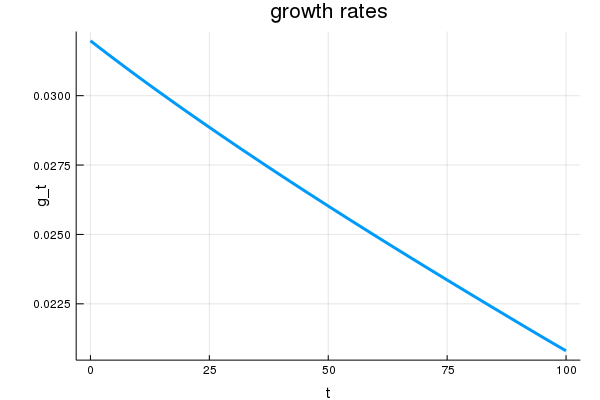

In [8]:
plot(settings.ts, g_ts, xlabel = "t", ylabel = "g_t", lw = 3, title = "growth rates", legend = false)

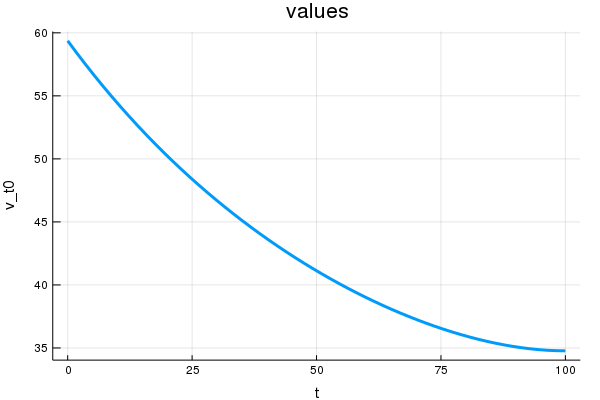

In [9]:
plot(settings.ts, v_ts[1, :], xlabel = "t", ylabel = "v_t0", lw = 3, title = "values", legend = false)

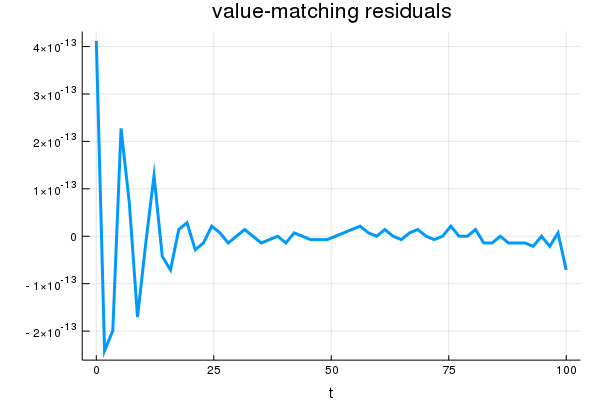

In [10]:
plot(settings.ts, residuals, xlabel = "t", lw = 3, title = "value-matching residuals", legend = false)